In [1]:
#pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import seaborn
import seaborn as sns


In [4]:

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")


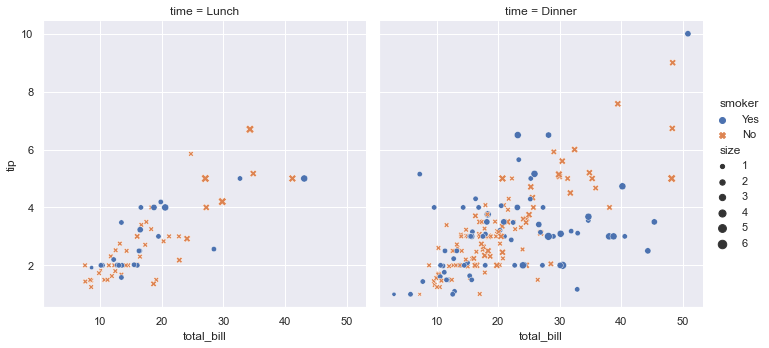

In [5]:

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

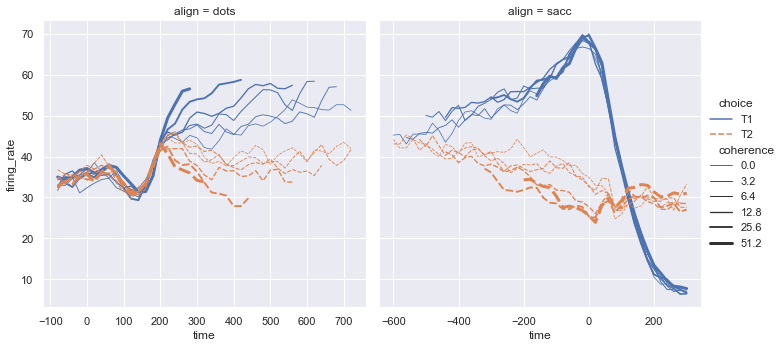

In [6]:
#A high-level API for statistical graphics
#Seaborn makes it easy to switch between different visual representations 
#by using a consistent dataset-oriented API.

#The function relplot() is designed to visualize many different statistical relationships. 
#The "kind" parameter  lets you easily switch to this alternate representation

dots = sns.load_dataset("dots")

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

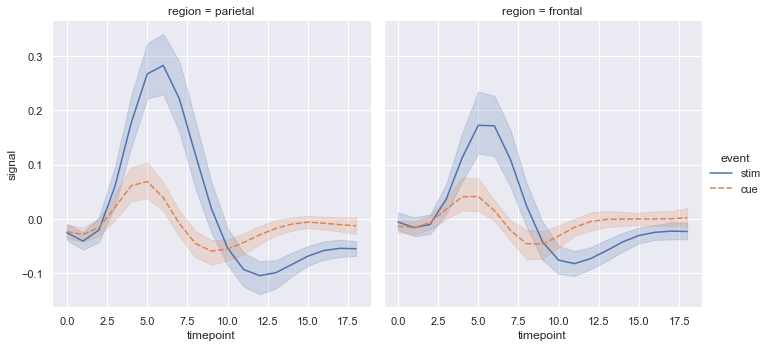

In [7]:
#Often, we are interested in the average value of one variable as a function of other variables. 
#Many seaborn functions will automatically perform the statistical estimation
#to answer these questions:

fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)



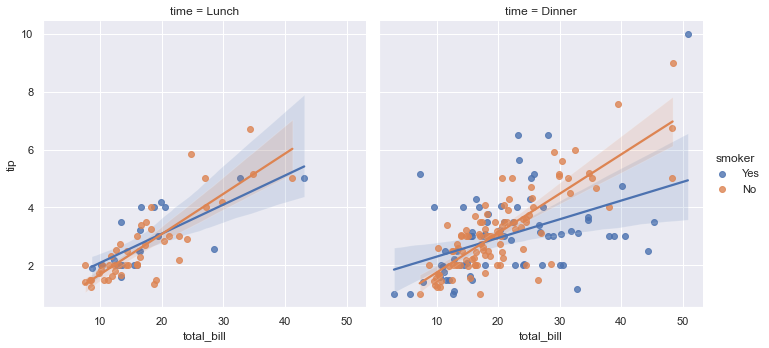

In [8]:
#including a linear regression model (and its uncertainty) using lmplot()

sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

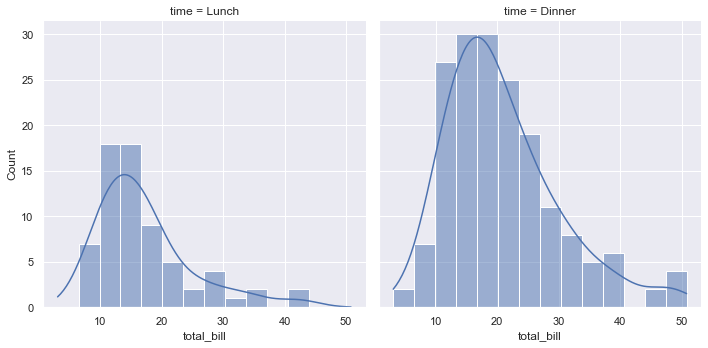

In [9]:
#Distributional representations

#The  function displot() supports several approaches to visualizing distributions. 
#These include classic techniques like histograms and 
#computationally-intensive approaches like kernel density estimation:

sns.displot(data=tips, x="total_bill", col="time", kde=True)

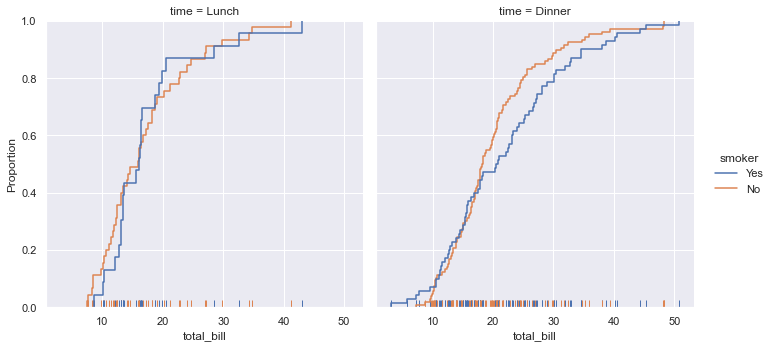

In [10]:
#Seaborn also offers cumulative distribution function of the data:

sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

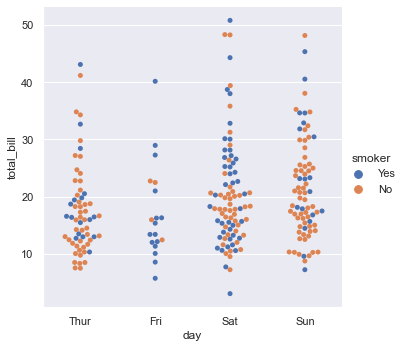

In [11]:
#Plots for categorical data

#this can be accessed through catplot(). 
#These plots offer different levels of granularity. 
#At the finest level, you may wish to see every observation by drawing a “swarm” plot 'kind': 
#a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

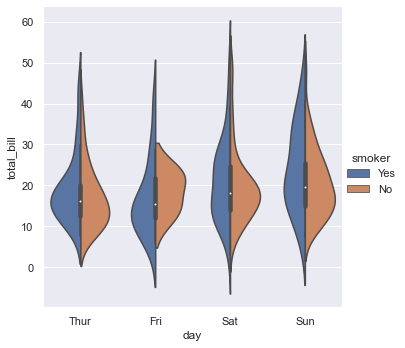

In [12]:
#Alternately, you could use kernel density estimation to 
#represent the underlying distribution that the points are sampled from:

sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)



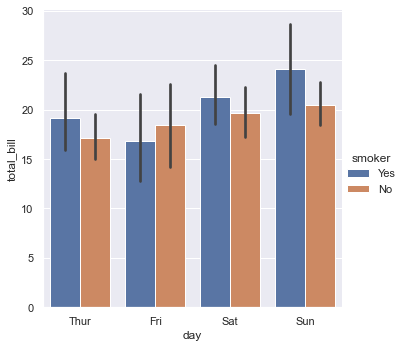

In [13]:
#Or you could show only the mean value and its confidence interval within each nested category:

sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

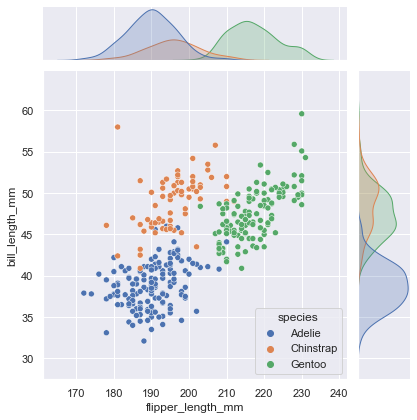

In [14]:
#Multivariate views on complex datasets
# One, jointplot(), focuses on a single relationship. 
#It plots the joint distribution between two variables along with each variable’s marginal distribution:

penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

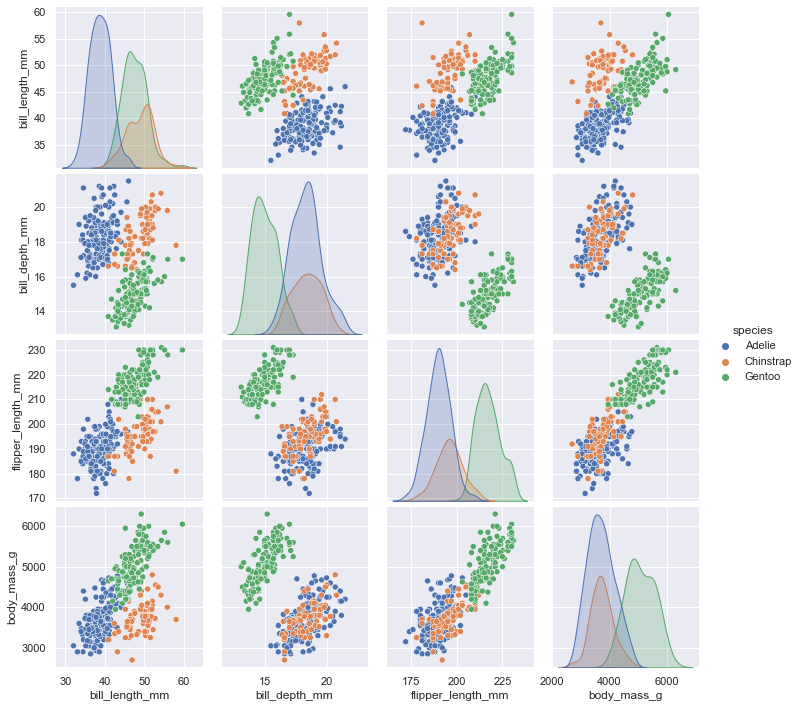

In [15]:
#The other, pairplot(), takes a broader view: 
#it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

sns.pairplot(data=penguins, hue="species")

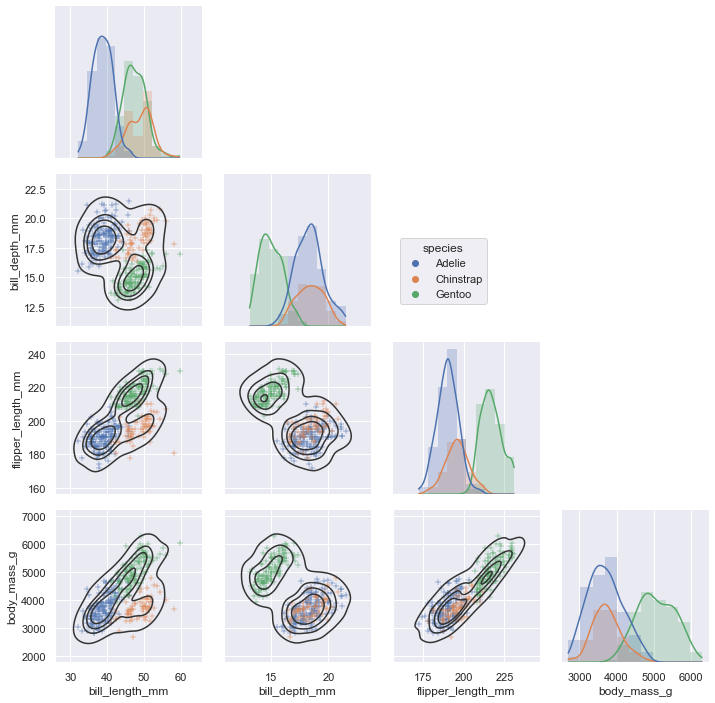

In [16]:
#Lower-level tools for building figures

#These tools work by combining axes-level plotting functions with 
#objects that manage the layout of the figure, 
#linking the structure of a dataset to a grid of axes. 
#Both elements are part of the public API, 
#and you can use them directly to create complex figures:

g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

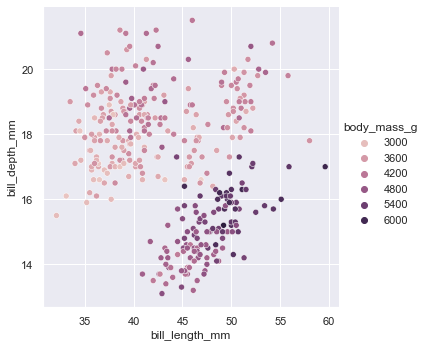

In [17]:
#Opinionated defaults and flexible customization
#Seaborn creates complete graphics with a single function call: 
#when possible, its functions will automatically add informative axis labels and legends 
#that explain the semantic mappings in the plot.

#In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. 
#For example, the color mappings that we have seen so far used distinct hues (blue, orange, and sometimes green) 
#to represent different levels of the categorical variables assigned to hue. 
#When mapping a numeric variable, some functions will switch to a continuous gradient:

sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

In [ ]:
#When you’re ready to share or publish your work, 
#you’ll probably want to polish the figure beyond what the defaults achieve. 
#Seaborn allows for several levels of customization. It defines multiple built-in themes that apply to all figures, its functions have standardized parameters that can modify the semantic mappings for each plot, and additional keyword arguments are passed down to the underlying matplotlib artists, allowing even more control. Once you’ve created a plot, its properties can be modified through both the seaborn API and by dropping down to the matplotlib layer for fine-grained tweaking:

sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

In [ ]:
################################################################

In [ ]:
################TRY with MY DATA##############

In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [19]:
os.chdir('/Users/nhutran/Documents/PhD/dormancy_redo')

In [20]:
dorm = pd.read_csv('/Users/nhutran/Documents/PhD/dormancy_redo/assays/assay_merged_dorm02_working_bio.csv')

In [23]:
dorm.head()

,ID,Internal_id,germinated,total,non_germinated,pdorm,Source_name,name,Parents_id,Amplification_round_starting,...,bio14,bio15,bio16,bio17,bio18,bio19,germinated.1,total.1,non_germinated.1,sdorm
0,10005,2021-0694,84,91,7,0.923077,A. thaliana,ICE63 / Copac-1,2017-264,9.2021,...,36,30,232,115,218,131,0,75,75.0,0.000000
1,10017,2021-0720,62,62,0,1.000000,A. thaliana,ICE21 / Petro-1,2017-263,9.2021,...,42,24,231,130,208,142,2,41,39.0,0.048780
2,1002,2021-0682,53,56,3,0.946429,A. thaliana,Ale-Stenar-64-24,2017-351,9.2021,...,32,21,180,103,168,136,0,43,43.0,0.000000
3,1061,2021-0691,72,80,8,0.900000,A. thaliana,Brösarp-11-135,2017-352,9.2021,...,35,21,191,111,179,147,0,55,55.0,0.000000
4,1062,2021-0609,66,66,0,1.000000,A. thaliana,Brösarp-15-138,2017-153,9.2021,...,35,21,191,111,179,147,86,90,4.0,0.955556


In [35]:
dorm['sdorm_strength'] = 1 - dorm['sdorm']

In [190]:
#####****************##########****************#####

############set my general theme############ 
sns.set_style("whitegrid")
sns.color_palette("colorblind")
sns.set(font_scale=1)

plt.rcParams["font.family"] = "Lucida Grande"
plt.rcParams["font.size"] = 12

#####****************##########****************#####

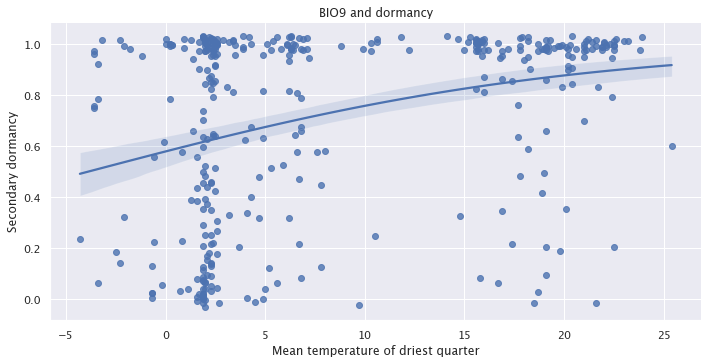

In [219]:
#bio9 vs sdorm

bio9s = sns.lmplot(x="bio9", y="sdorm_strength", data=dorm,
                   logistic=True, y_jitter=.03,
                   height =5, aspect = 2)

bio9s.set(xlabel ="Mean temperature of driest quarter", ylabel = "Secondary dormancy", title ='BIO9 and dormancy')


In [181]:
bio9s.savefig('sns_bio9_sdorm_widerversion.pdf')

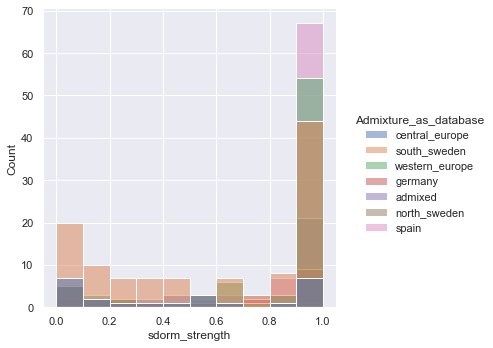

In [56]:
#distribution plot
sns.displot(dorm, x="sdorm_strength", hue="Admixture_as_database", common_norm=False)

    #not so nice choice here apparently

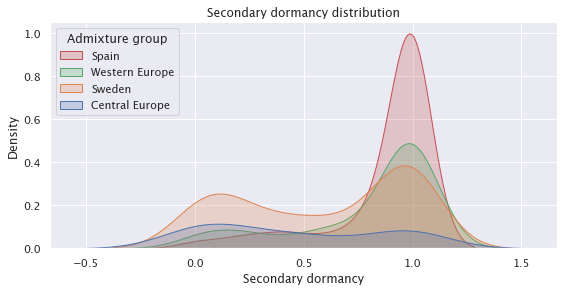

In [178]:
hist = sns.displot(dorm, x="sdorm_strength", hue="Admixture_internal", kind = 'kde', fill = True, legend = False,
                  height = 4, aspect = 2,)
hist.set(xlabel ="Secondary dormancy", ylabel = "Density", title ='Secondary dormancy distribution')
plt.legend(title='Admixture group', loc='upper left', labels=['Spain','Western Europe','Sweden','Central Europe'])

In [179]:
hist.savefig('sns_sdorm_distribution_widerversion.pdf')

In [ ]:
##### Correlation with flowering time ####

In [71]:
ft = pd.read_csv('/Users/nhutran/Documents/Phd/dormancy_redo/runs/combined_data/sdorm_ft_combined.csv')

In [72]:
ft.head()

,ID,Internal_id,germinated,total,non_germinated,rate,accession_name,accession_cs_number,accession_longitude,accession_latitude,accession_country,FT16,obs_unit_id,FT10
0,8256,2021-0432,48,52,4.0,0.923077,Bå1-2,CS76676,12.9000,56.4000,Sweden,45.25,7039,73.250000
1,5865,2021-0433,16,56,40.0,0.285714,Dra1-4,CS76809,14.1200,55.7600,Sweden,101.00,6632,109.750000
2,9395,2021-0434,0,41,41.0,0.000000,Hal-1,CS76908,15.0105,57.5089,Sweden,118.25,7161,104.500000
3,6924,2021-0435,0,43,43.0,0.000000,HR-5,CS76514,-0.6383,51.4083,UK,47.00,6798,61.500000
4,6088,2021-0436,3,40,37.0,0.075000,Stu1-1,CS77285,16.1284,56.4666,Sweden,128.00,6676,107.666667


In [117]:
ft['strength'] = 1 - ft['rate']

In [191]:
ft_sub = ft[['FT10','FT16','strength']]

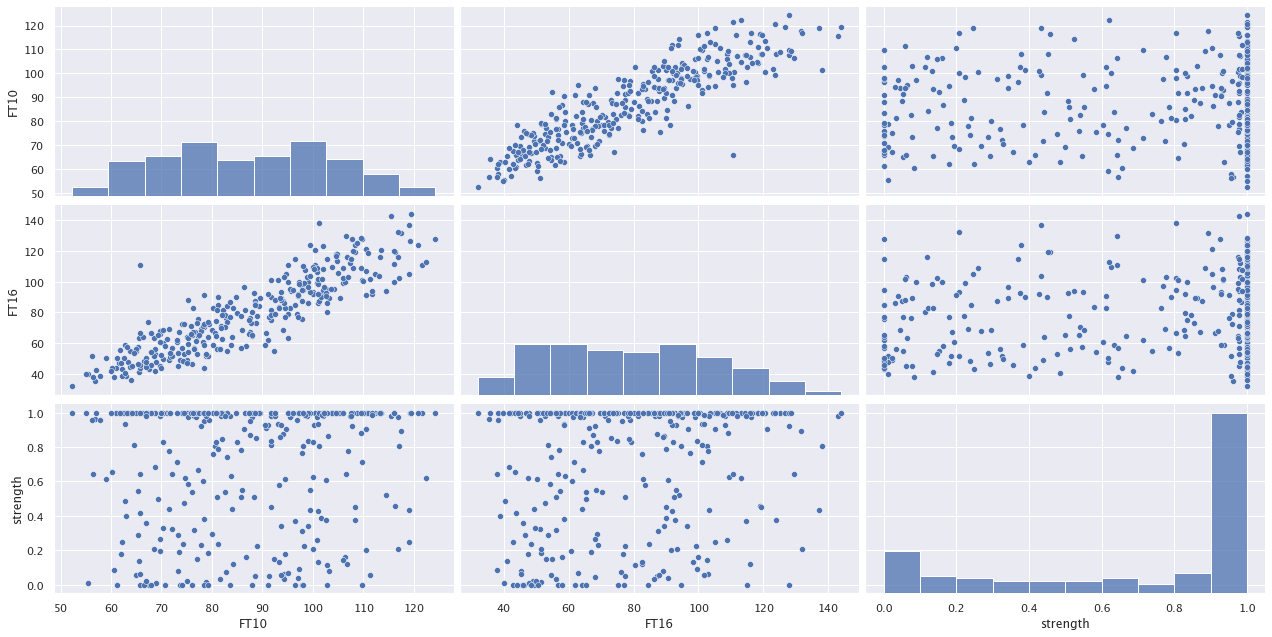

In [194]:
fts = sns.pairplot(data=ft_sub, height = 3, aspect = 2)

In [195]:
ft_sub['FTdiff'] = ft_sub['FT10'] - ft_sub['FT16']

/var/folders/_n/6f9lbyk959q4h617mnpxbxx40000gn/T/ipykernel_59933/1665252863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_sub['FTdiff'] = ft_sub['FT10'] - ft_sub['FT16']


In [289]:
ft_sub.head()

,FT10,FT16,FTdiff,strength,lat
0,73.250000,45.25,28.000000,0.076923,56.4000
1,109.750000,101.00,8.750000,0.714286,55.7600
2,104.500000,118.25,-13.750000,1.000000,57.5089
3,61.500000,47.00,14.500000,1.000000,51.4083
4,107.666667,128.00,-20.333333,0.925000,56.4666


In [240]:
ft_sub['lat'] = ft[['accession_latitude']]

/var/folders/_n/6f9lbyk959q4h617mnpxbxx40000gn/T/ipykernel_59933/2364321558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_sub['lat'] = ft[['accession_latitude']]


In [290]:
ft_sub = ft_sub[['FT10','FT16','FTdiff','lat','strength']]

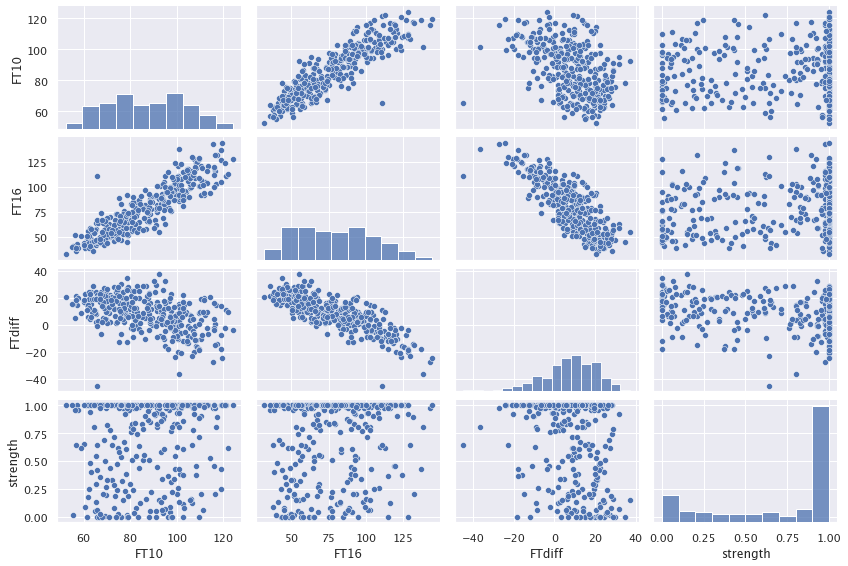

In [202]:
fts_1 = sns.pairplot(data=ft_sub, height = 2, aspect = 1.5)

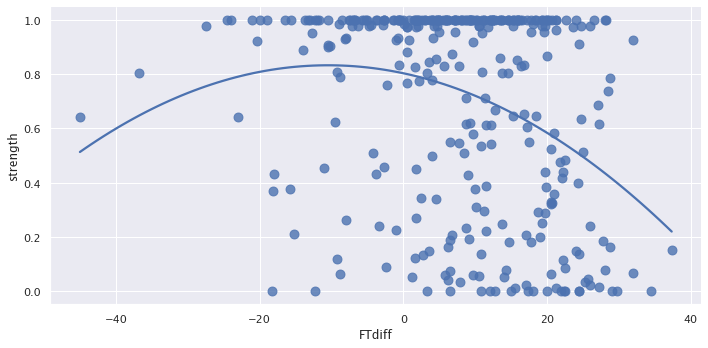

In [203]:
#this fit a polynomial regression model to explore simple kinds of nonlinear trends:
fts_2 = sns.lmplot(x="FTdiff", y="strength", data=ft_sub, height = 5, aspect =2, 
           order=2, ci=None, scatter_kws={"s": 80})

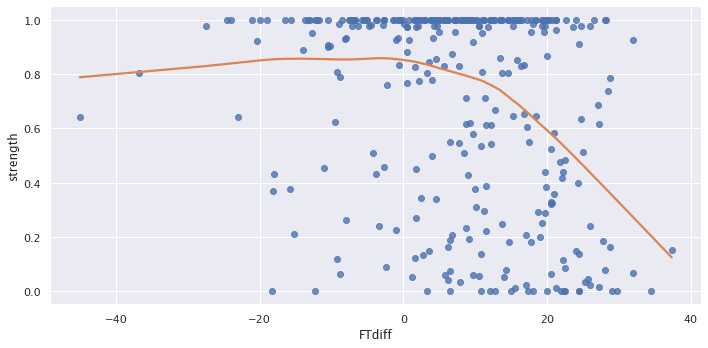

In [205]:
#Another approach is to fit a nonparametric regression using lowess smoother. 
#This approach has the fewest assumptions, although it is computationally intensive 
#and so currently confidence intervals are not computed at all:


fts_3 = sns.lmplot(x="FTdiff", y="strength", data=ft_sub, height =5, aspect =2,
           lowess=True, line_kws={"color": "C1"})

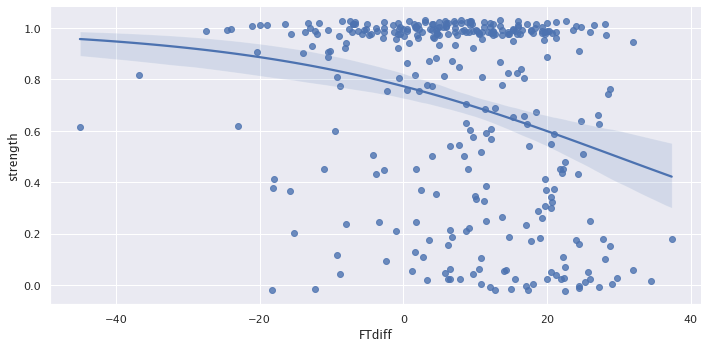

In [207]:
#this is to fit a logistic regression, 
#the regression line shows the estimated probability of y = 1 for a given value of x:

fts_4 = sns.lmplot(x="FTdiff", y="strength", data=ft_sub,
                   height =5, aspect = 2,
                   logistic=True, y_jitter=.03)

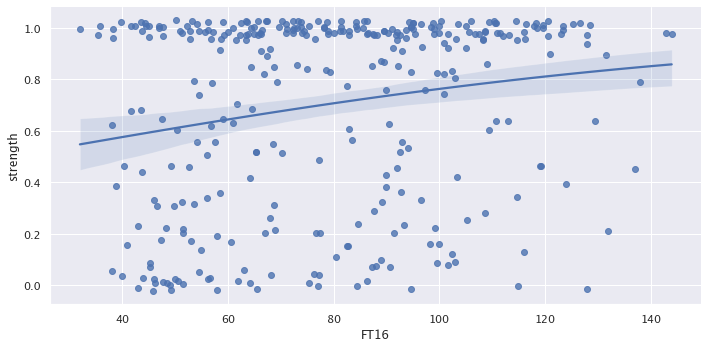

In [175]:
fts_5 = sns.lmplot(x="FT16", y="strength", data=ft_sub,height =5, aspect = 2,
                   logistic=True, y_jitter=.03)

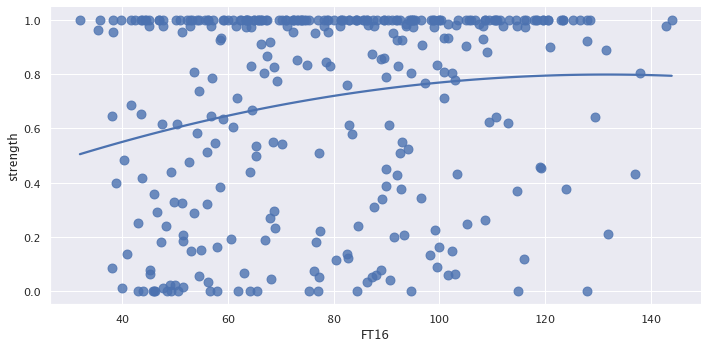

In [213]:
fts_5_1 = sns.lmplot(x="FT16", y="strength", data=ft_sub, height = 5, aspect =2, 
           order=2, ci=None, scatter_kws={"s": 80})

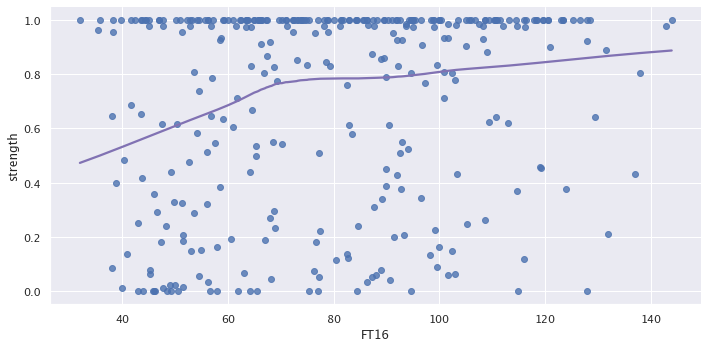

In [218]:
fts_5_3 = sns.lmplot(x="FT16", y="strength", data=ft_sub, height = 5, aspect =2,
           lowess=True, line_kws={"color": "C4"})

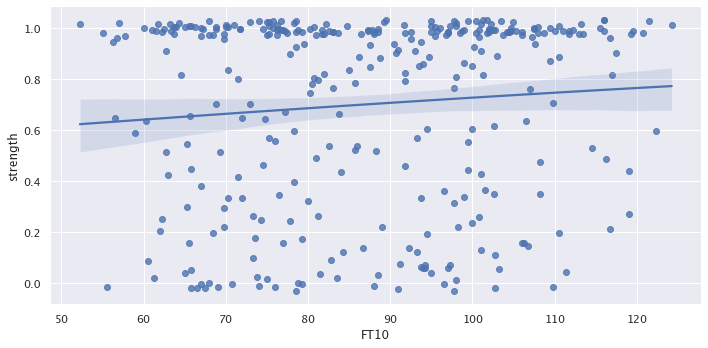

In [176]:
fts_6 = sns.lmplot(x="FT10", y="strength", data=ft_sub,height =5, aspect = 2,
                   logistic=True, y_jitter=.03)

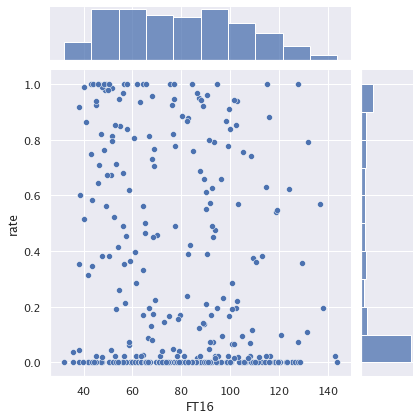

In [144]:
sns.jointplot(data=ft, x="FT16", y="rate")

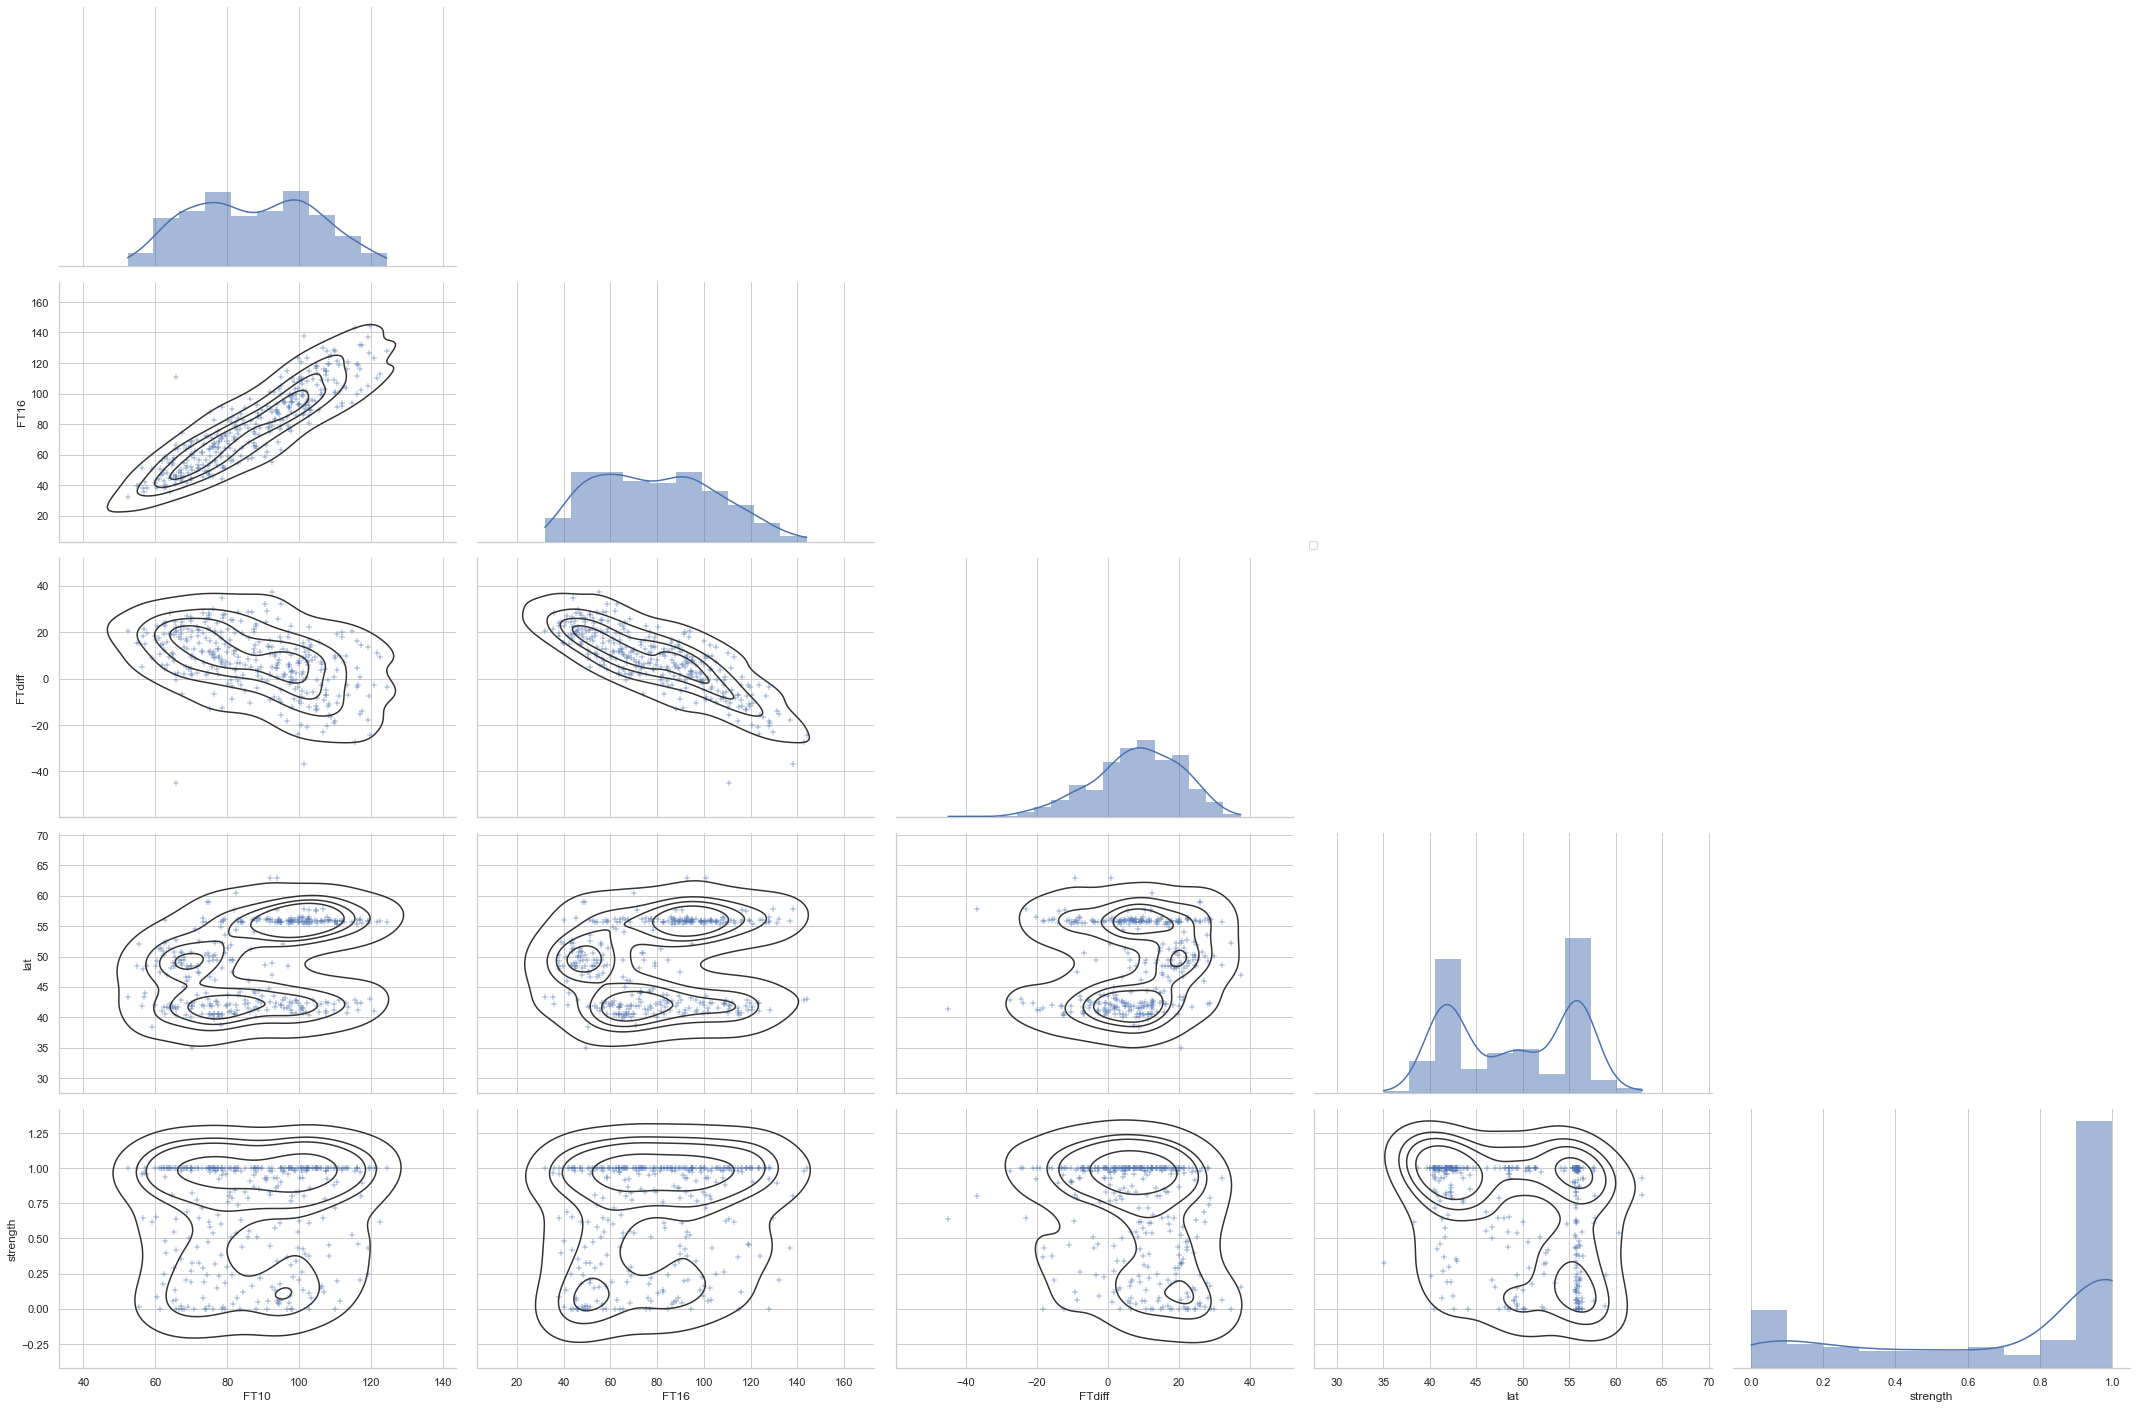

In [292]:


fts_7 = sns.PairGrid(ft_sub, corner=True, height = 4, aspect = 1.5)
fts_7.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
fts_7.map_lower(sns.scatterplot, marker="+")
fts_7.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
fts_7.add_legend(frameon=True)
fts_7.legend.set_bbox_to_anchor((.61, .6))


In [ ]:
#Visualise sliding windows

In [120]:
slide16 = pd.read_csv('/Users/nhutran/Documents/PhD/dormancy_redo/runs/combined_data/cor_sdorm_strength_FT16_window.csv')

In [121]:
slide10 = pd.read_csv('/Users/nhutran/Documents/PhD/dormancy_redo/runs/combined_data/cor_sdorm_strength_FT10_window.csv')

In [85]:
slide16.head()

,lat,r,p,group
0,47.992317,-0.080742,0.490308,non-significant
1,47.967520,-0.063428,0.589969,non-significant
2,47.654105,-0.072095,0.540288,non-significant
3,47.618766,-0.043921,0.707533,non-significant
4,47.733198,-0.072302,0.537069,non-significant


In [123]:
slide16.loc[slide16['p'] <= 0.05, ['group']] = 'significant'
slide16.loc[slide16['p'] > 0.05, ['group']] = 'non-significant'

In [124]:
slide10.loc[slide10['p'] <= 0.05, ['group']] = 'significant'
slide10.loc[slide10['p'] > 0.05, ['group']] = 'non-significant'

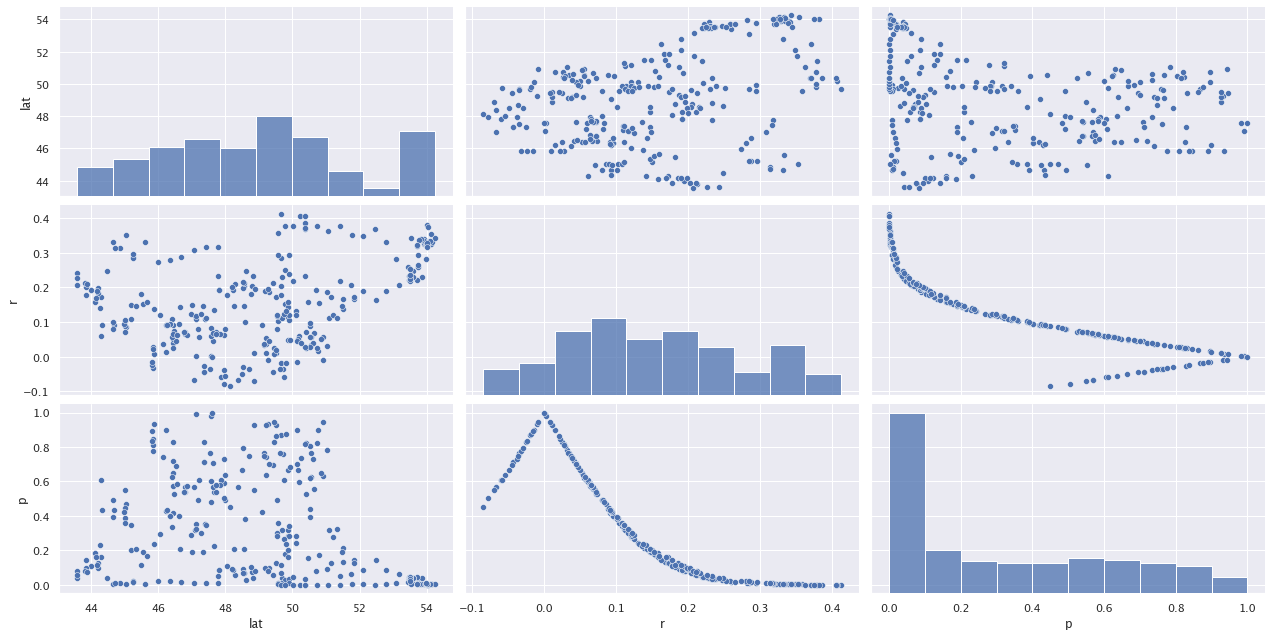

In [172]:
win16 = sns.pairplot(data=slide16, height =3, aspect = 2)

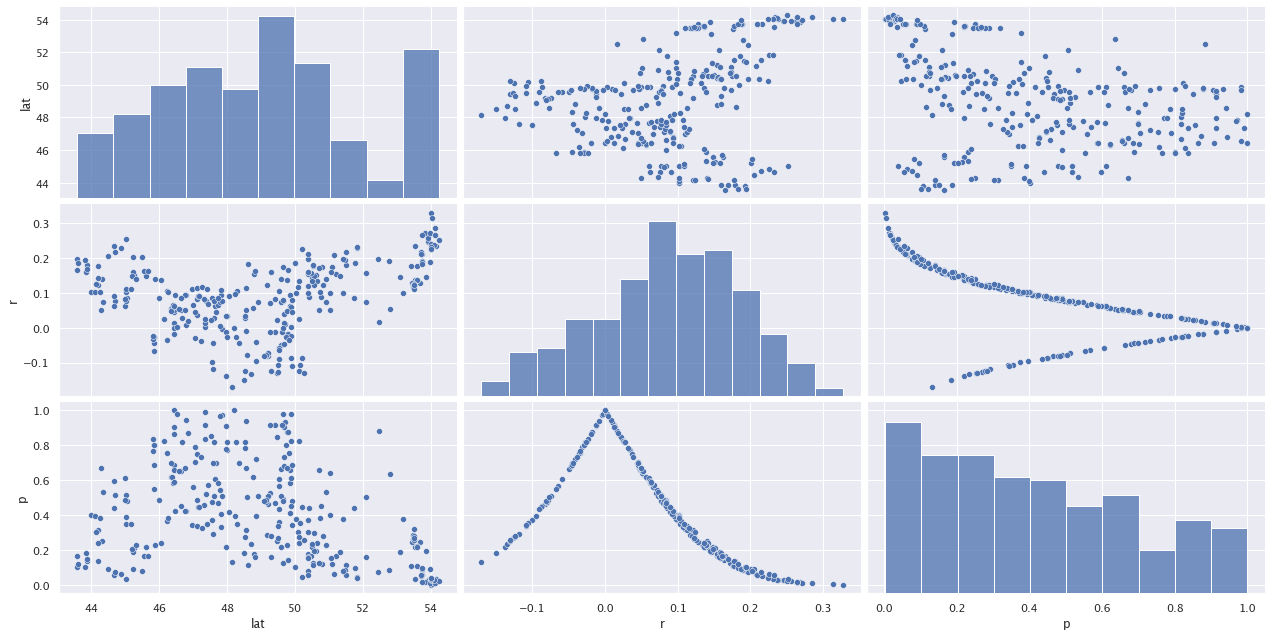

In [173]:
win10 = sns.pairplot(data=slide10, height =3, aspect = 2)

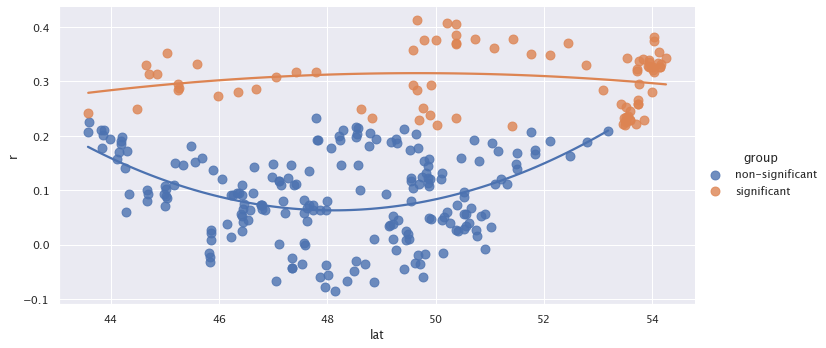

In [160]:

win16_1 = sns.lmplot(x="lat", y="r", data=slide16, hue = "group", 
                     height = 5, #5 units in height
                     aspect = 2, #width is 2 times as height
                     order=2, ci=None, scatter_kws={"s": 80})

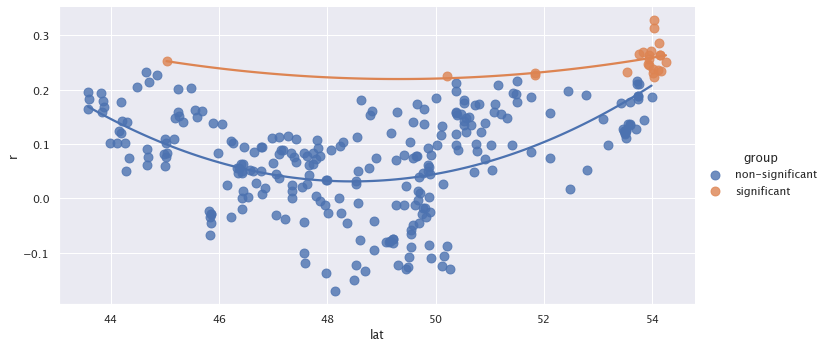

In [161]:
win10_1 = sns.lmplot(x="lat", y="r", data=slide10, hue = "group", height =5, aspect = 2,
           order=2, ci=None, scatter_kws={"s": 80})

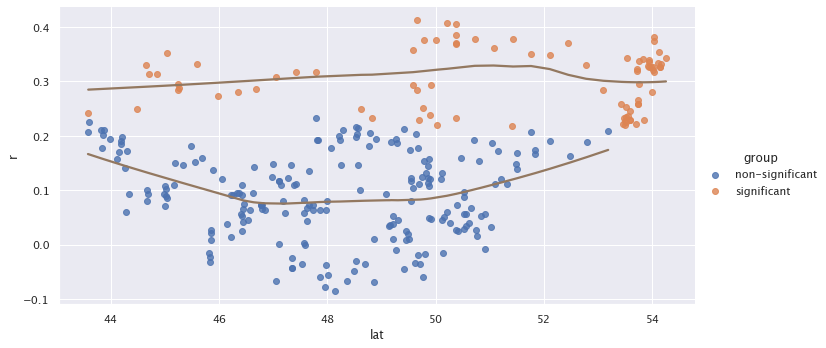

In [232]:
win16_2 = sns.lmplot(x="lat", y="r", data=slide16, hue = "group", height =5, aspect = 2,
           lowess=True, line_kws={"color": "C5"})

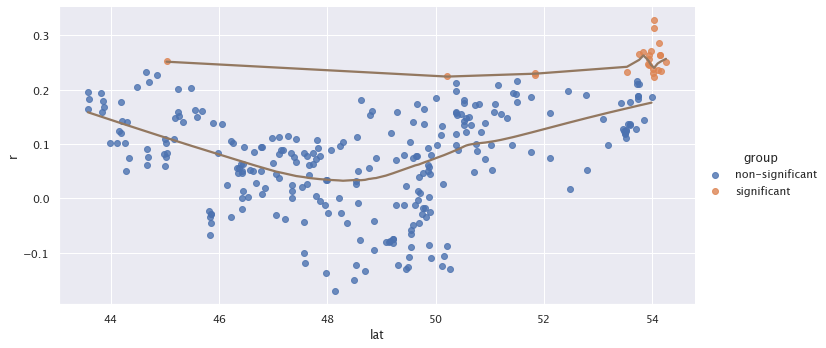

In [231]:
win10_2 = sns.lmplot(x="lat", y="r", data=slide10, hue = "group",height =5, aspect = 2,
           lowess=True, line_kws={"color": "C5"})

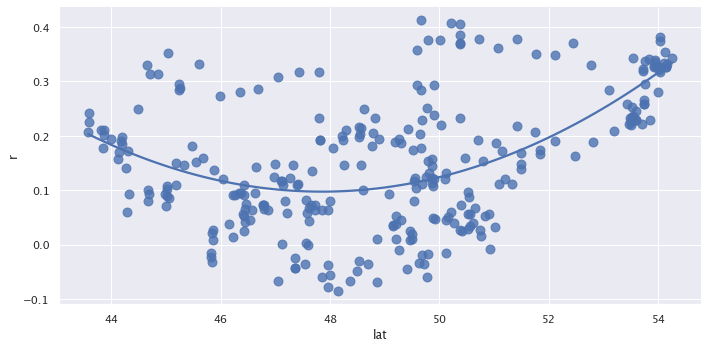

In [168]:
win16_3 = sns.lmplot(x="lat", y="r", data=slide16,height = 5, aspect = 2,
           order=2, ci=None, scatter_kws={"s": 80})

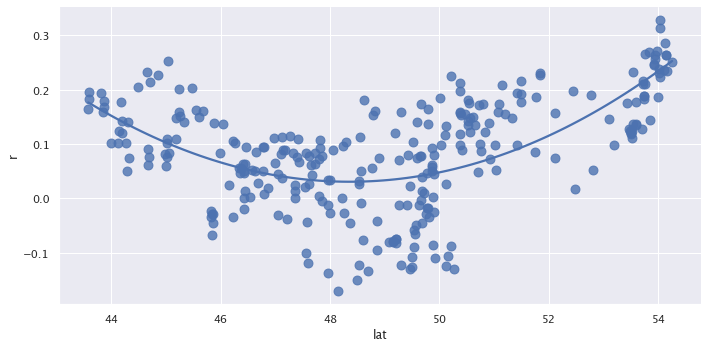

In [165]:
win10_3 = sns.lmplot(x="lat", y="r", data=slide10,height =5, aspect = 2,
           order=2, ci=None, scatter_kws={"s": 80})

No handles with labels found to put in legend.


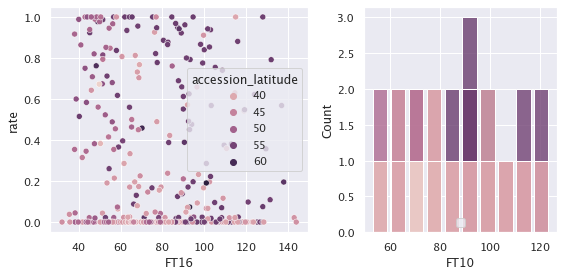

In [152]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=ft, x="FT16", y="rate", hue="accession_latitude", ax=axs[0], legend = True)
sns.histplot(data=ft, x="FT10", hue="accession_latitude", shrink=.8, alpha=.8, legend=False, ax=axs[1])
plt.legend(loc = 'lower center')
f.tight_layout()

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


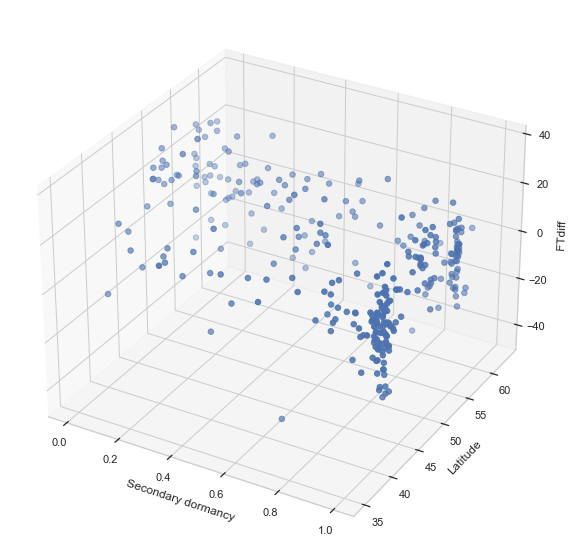

In [286]:
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
print(type(axes))
axes.scatter3D(ft_sub["strength"], ft_sub["lat"], ft_sub["FTdiff"], s = 30)

axes.set_xlabel('Secondary dormancy')
axes.set_ylabel('Latitude')
axes.set_zlabel('FTdiff')

plt.show()